In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statistics
import math
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter

In [188]:
data = pd.read_csv('dropout-dataset.csv')

In [189]:
data.columns = ['SNO','Gender','SocialCategory','Religion','BPL','Disadvantaged','FreeEducation','Attendance','Homeless','ExamMarks','Disablility','Dropout']


In [190]:
data.drop('SNO',inplace=True, axis=1)


In [191]:
data.shape

(17359, 11)

In [192]:
data.head()

,Gender,SocialCategory,Religion,BPL,Disadvantaged,FreeEducation,Attendance,Homeless,ExamMarks,Disablility,Dropout
0,0,0,0,0,0,0,48,0,51,0,1
1,0,0,0,0,0,0,48,0,48,0,0
2,0,0,0,0,0,0,48,0,86,0,0
3,0,0,0,0,0,0,33,0,33,0,1
4,1,1,0,0,0,0,73,0,96,0,0


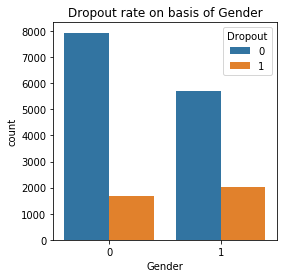

In [114]:
#Gender Vs Dropout Plot
f, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x="Gender", hue='Dropout', data=data).set_title('Dropout rate on basis of Gender')
plt.show()

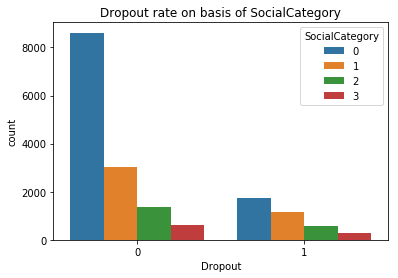

In [115]:
#SocialCategory Vs Dropout Plot
sns.countplot( x='Dropout' , hue="SocialCategory", data=data).set_title('Dropout rate on basis of SocialCategory')
plt.show()



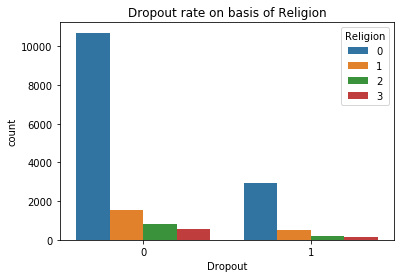

In [116]:
#Religion Vs Dropout Plot
sns.countplot(x='Dropout',hue="Religion",  data=data).set_title('Dropout rate on basis of Religion')
plt.show()



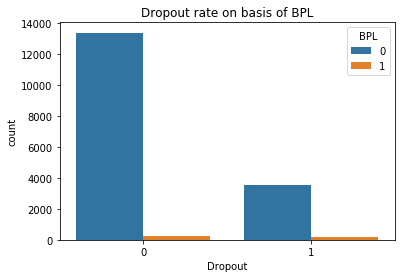

In [117]:
#BPL Vs Dropout Plot
sns.countplot( x='Dropout',hue="BPL", data=data).set_title('Dropout rate on basis of BPL')
plt.show()



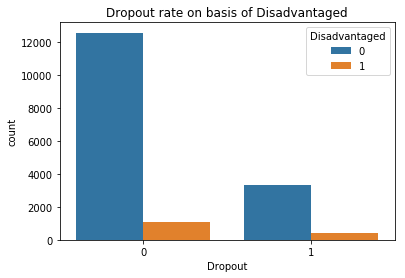

In [118]:
#Disadvantaged Vs Dropout Plot
sns.countplot(x="Dropout", hue='Disadvantaged', data=data).set_title('Dropout rate on basis of Disadvantaged')
plt.show()



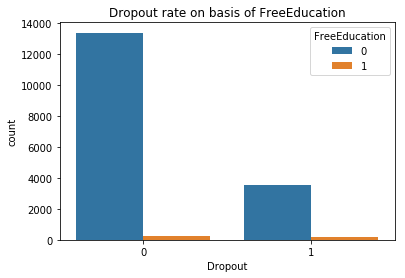

In [120]:
#FreeEducation Vs Dropout Plot
sns.countplot(x="Dropout", hue='FreeEducation', data=data).set_title('Dropout rate on basis of FreeEducation')
plt.show()



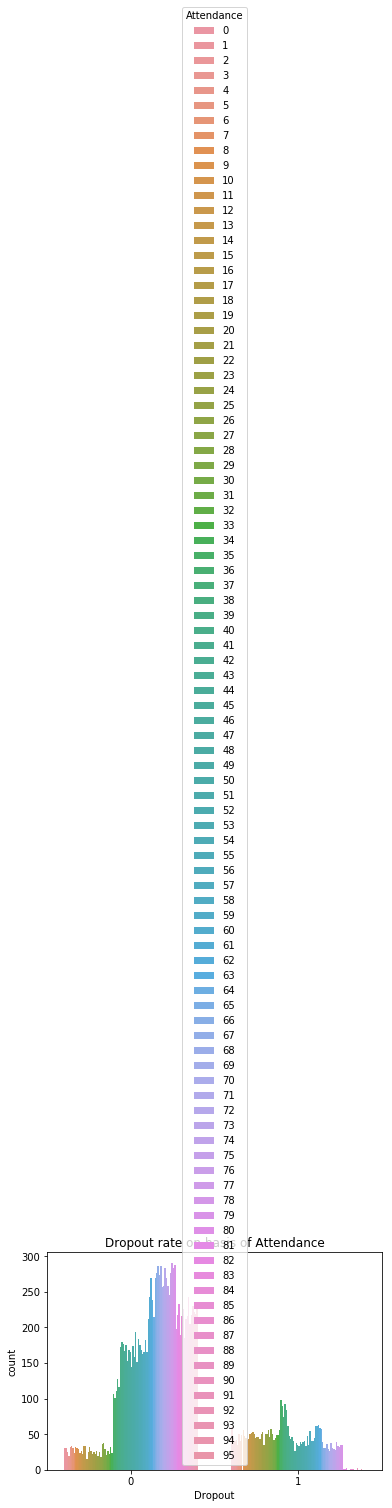

In [121]:
#Attendance Vs Dropout Plot
sns.countplot(x="Dropout", hue='Attendance', data=data).set_title('Dropout rate on basis of Attendance')
plt.show()


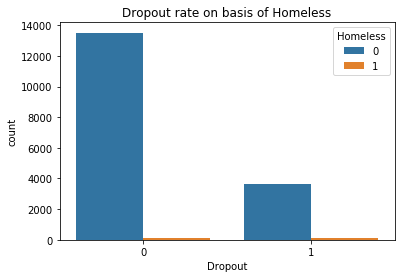

In [122]:

#Homeless Vs Dropout Plot
sns.countplot(x="Dropout", hue='Homeless', data=data).set_title('Dropout rate on basis of Homeless')
plt.show()


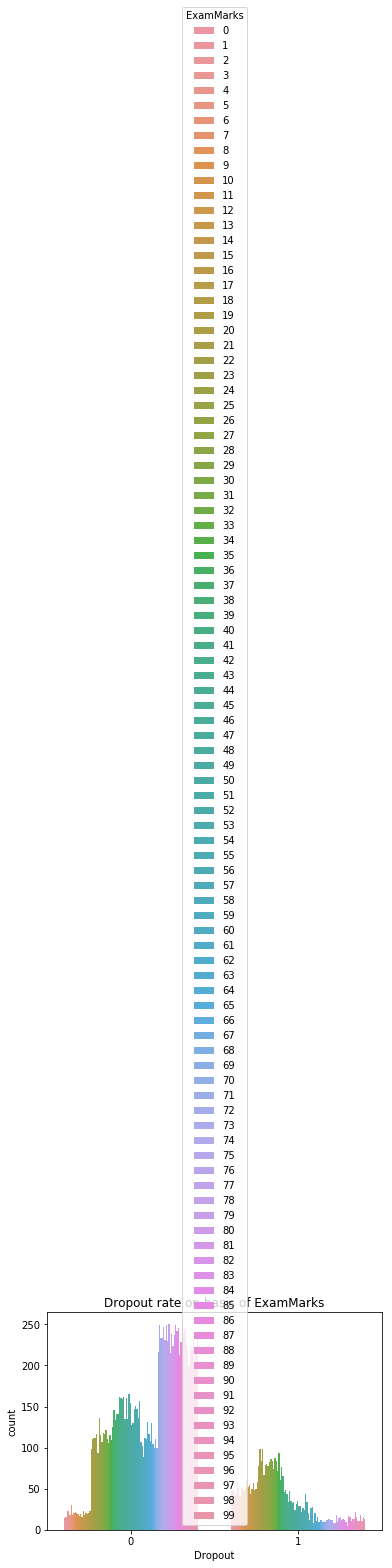

In [123]:

#ExamMarks Vs Dropout Plot
sns.countplot(x="Dropout", hue='ExamMarks', data=data).set_title('Dropout rate on basis of ExamMarks')
plt.show()



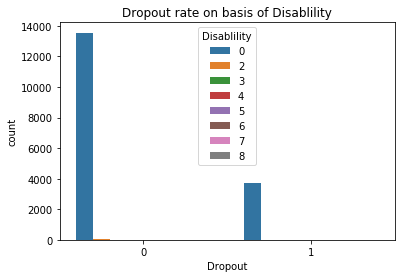

In [124]:
#Disablility Vs Dropout Plot
sns.countplot(x="Dropout", hue='Disablility', data=data).set_title('Dropout rate on basis of Disablility')
plt.show()


### data preprocessing: one hot representation and data standardization

In [193]:
data.shape

(17359, 11)

In [194]:
tdf=pd.get_dummies(data['SocialCategory'],prefix=['SocialCategory'],dtype='float')
tdf1=pd.get_dummies(data['Gender'],prefix=['Gender'],dtype='float')
tdf2=pd.get_dummies(data['Religion'],prefix=['Religion'],dtype='float')
abc=pd.concat([tdf,tdf1,tdf2],axis=1,sort=False)
data['Attendance']=(data['Attendance']-data['Attendance'].mean())/data['Attendance'].std()
data['ExamMarks']=(data['ExamMarks']-data['ExamMarks'].mean())/data['ExamMarks'].std()
data=data.drop(['Gender','Religion','SocialCategory'],axis=1)
x=data.drop('Dropout',axis=1)
y=data['Dropout']
x=pd.concat([abc,x],axis=1,sort=False)

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

# Model implementation
## Since, a student who is likely to drop out classified as ’retained’ is worse than vice-versa, the agenda is to select the model that provides sufficiently low false negatives with reasonable number of false positives. We use weightedaccuracy in which the cost of True Positive Rate is higher than that of True Negative Rate.
## so weighted accuracy=0.7(TP/P) + 0.3(TN/N)

## KNN implementation

In [212]:
simplefilter(action='ignore', category=FutureWarning)

In [199]:
k=[i for i in range(1,50,2)]
wt_accuracy=[]
for l in k:
    knn = KNeighborsClassifier(n_neighbors = l)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    mat=confusion_matrix(y_test, y_pred)
    wt_accuracy.append(0.7*(mat[1][1]/sum(mat[1]))+0.3*(mat[0][0]/sum(mat[0])))

In [200]:
wt_accuracy

[0.667789172252852,
 0.6702011026711419,
 0.6693882499511887,
 0.675763027975864,
 0.6778832433035507,
 0.6730635105107059,
 0.6727368744014801,
 0.6730111475775635,
 0.6654536664280335,
 0.6701088353152282,
 0.6696891136792584,
 0.670821945573045,
 0.6699276476658889,
 0.6758968360962094,
 0.6728848145634407,
 0.6695985198545887,
 0.6706764971131586,
 0.6671541601197504,
 0.6667892931189974,
 0.6670253354035535,
 0.66815816729734,
 0.6689236404882992,
 0.6703282538560948,
 0.6657470550498805,
 0.6664219344161699]

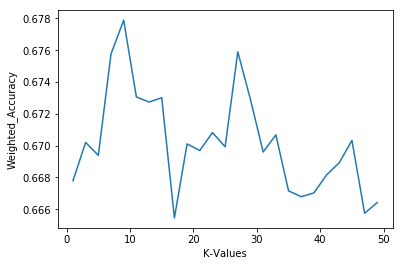

In [201]:
plt.plot(k,wt_accuracy)
plt.xlabel("K-Values")
plt.ylabel("Weighted_Accuracy")

plt.show()

### optimal k value is 9: wt.accuracy=67.7

## hyper parameter tuning using gridsearchcv

In [203]:
model = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,50,2)]}
model1 = GridSearchCV(model, param_grid=params,cv=10,scoring='f1')
model1.fit(x_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'n_neighbors': 9}


In [204]:
y_pred=model1.predict(x_test)
mat=confusion_matrix(y_test, y_pred)
print(mat)
print((0.7*(mat[1][1]/sum(mat[1]))+0.3*(mat[0][0]/sum(mat[0]))))

[[5203  266]
 [ 648  827]]
0.6778832433035507


# Logistic regression implementation

In [213]:
param_grid = {'C': [0.01, 0.1, 1,10,100] ,'penalty' : ['l1', 'l2']}
model2 = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='f1')

In [214]:
model2.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [215]:
model2.best_params_

{'C': 10, 'penalty': 'l1'}

In [216]:
abc=model2.predict(x_test)
mat=confusion_matrix(y_test, abc)
print(mat)
print((0.7*(mat[1][1]/sum(mat[1]))+0.3*(mat[0][0]/sum(mat[0]))))

[[5190  279]
 [ 698  777]]
0.6534413194864118


## SVM implementation

In [217]:
Cs = [0.01, 0.1, 1, 10,100]
# gammas = [0.01, 0.1, 1]
kernels = ['linear', 'rbf','poly']
param_grid = {'kernel':kernels,'C':Cs}

model3 = GridSearchCV(svm.SVC(), param_grid,cv=10,scoring='f1')
model3.fit(x_train,y_train)

/home/yaswanth/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yaswanth/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yaswanth/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yaswanth/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yaswanth/.local/lib/python3.6/site-packages/sklearn/metric

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [ ]:
model3.best_params_

In [ ]:
abc=model3.predict(x_test)
mat=confusion_matrix(y_test, abc)
print(mat)
print((0.7*(mat[1][1]/sum(mat[1]))+0.3*(mat[0][0]/sum(mat[0]))))

In [ ]:
param_test2 = {'n_estimators':[50]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1),param_grid = param_test2,scoring='f1',cv=10)
gsearch2.fit(x_train,y_train)

In [ ]:
gsearch2.best_params_

In [33]:
x.head()

,['SocialCategory']_0,['SocialCategory']_1,['SocialCategory']_2,['SocialCategory']_3,['Gender']_0,['Gender']_1,['Religion']_0,['Religion']_1,['Religion']_2,['Religion']_3,BPL,Disadvantaged,FreeEducation,Attendance,Homeless,ExamMarks,Disablility
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,-0.447456,0,-0.238039,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,-0.447456,0,-0.348947,0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,-0.447456,0,1.055883,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,-1.083366,0,-0.903484,0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0.612394,0,1.425574,0


In [62]:
x1=data.drop('Dropout',axis=1)
x2=x.drop('Disablility',axis=1)
y2=data['Dropout']
x_train1,x_test1,y_train1,y_test1=train_test_split(x2,y2,test_size=0.4,random_state=1)

In [63]:
x_test1.shape

(6944, 16)

In [78]:
# for i in range(1,50):
#     print(i)
qq=GradientBoostingClassifier(max_depth=5, learning_rate=1, n_estimators=50)
qq.fit(x_train1,y_train1)
abc=qq.predict(x_test1)
mat=confusion_matrix(y_test1, abc)
print(mat)
print((0.7*(mat[1][1]/sum(mat[1]))+0.3*(mat[0][0]/sum(mat[0]))))

[[5085  384]
 [ 638  837]]
0.6761561590598473


In [ ]:
x_test.shape

In [ ]:
accuracy_score(y_test,abc)